In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States'].copy()
df_exploded = df_US.explode('job_skills')

In [ ]:
skills_stats = df_exploded.groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'), skill_count= ('job_skills', 'size'))

In [12]:
top10_skill_sal = skills_stats.sort_values('median_salary',ascending= False).dropna(subset='median_salary').head(10)
top10_skill_sal

,median_salary,skill_count
job_skills,,
haskell,213000.00000,32
ruby on rails,187750.00000,79
ringcentral,182500.00000,44
solidity,177000.00000,69
elixir,175610.34375,30
mongo,173500.00000,2014
dplyr,167500.00000,201
vue,167423.50000,130
unreal,166183.50000,52


In [18]:
top10_skill_count = skills_stats.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10).sort_values('median_salary',ascending= False)
top10_skill_count

,median_salary,skill_count
job_skills,,
spark,142500.0,30178
aws,136400.0,38150
azure,128025.0,27783
python,128000.0,107176
r,122165.5,51253
sql,120000.0,115048
tableau,114000.0,49596
sas,110000.0,37364
power bi,102500.0,26559


In [74]:
top3_roles = df['job_title_short'].value_counts().index[:3]
top3_roles

Index(['Data Analyst', 'Data Engineer', 'Data Scientist'], dtype='object', name='job_title_short')

In [39]:
skills_stats_DA = df_exploded[df_exploded['job_title_short']=='Data Analyst'].groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'), skill_count= ('job_skills', 'size'))
skills_stats_EN = df_exploded[df_exploded['job_title_short']=='Data Engineer'].groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'), skill_count= ('job_skills', 'size'))
skills_stats_SC = df_exploded[df_exploded['job_title_short']=='Data Scientist'].groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'), skill_count= ('job_skills', 'size'))

top10_skill_sal_DA = skills_stats_DA.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10).sort_values('median_salary',ascending= False)
top10_skill_sal_EN = skills_stats_EN.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10).sort_values('median_salary',ascending= False)
top10_skill_sal_SC = skills_stats_SC.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10).sort_values('median_salary',ascending= False)

top10_skill_sal_DA

,median_salary,skill_count
job_skills,,
python,97500.00,18382
oracle,96923.75,5109
tableau,92875.00,19311
r,92500.00,11659
sql,91000.00,34452
sas,90000.00,13200
power bi,90000.00,11630
powerpoint,85000.00,7175
excel,84392.00,27519


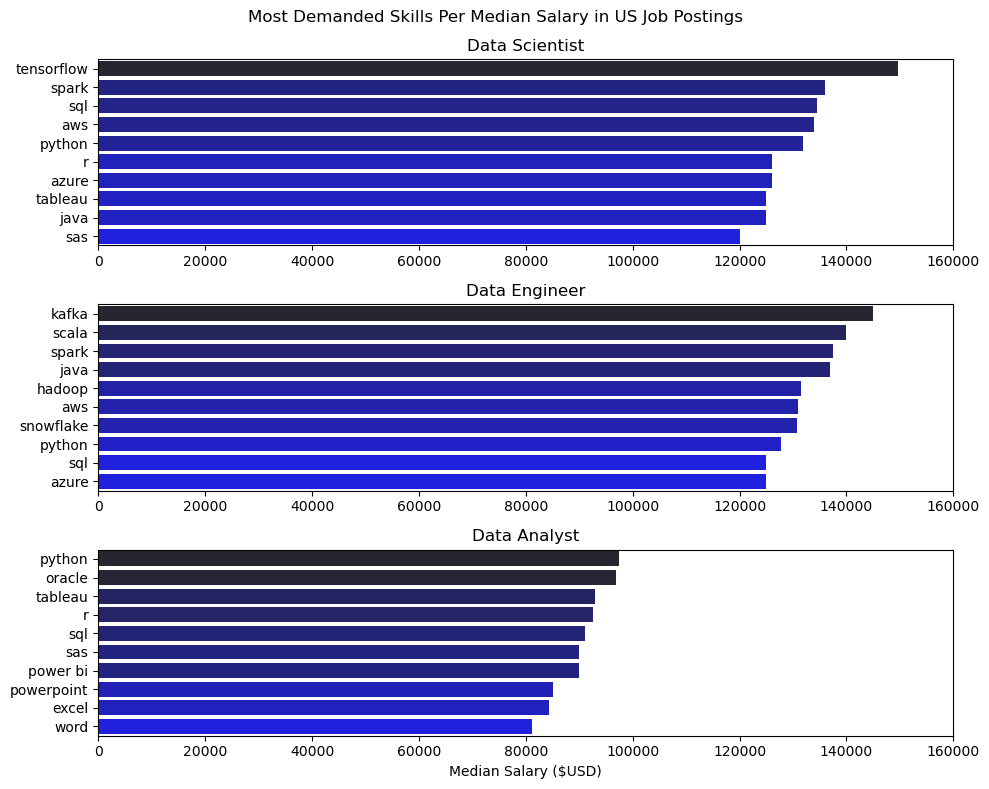

In [80]:
fig, ax= plt.subplots(3,1, figsize= (10,8))

sns.barplot(data=top10_skill_sal_DA, x='median_salary', y='job_skills', ax= ax[2], hue='median_salary', palette='dark:b_r',legend=False)

sns.barplot(data=top10_skill_sal_EN, x='median_salary', y='job_skills', ax= ax[1], hue='median_salary', palette='dark:b_r',legend=False)

sns.barplot(data=top10_skill_sal_SC, x='median_salary', y='job_skills', ax= ax[0], hue='median_salary', palette='dark:b_r',legend=False)

for i, title in enumerate(top3_role):
    ax[i].set_xlim(0,160000)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

ax[2].set_xlabel('Median Salary ($USD)')
fig.suptitle('Most Demanded Skills Per Median Salary in US Job Postings')
fig.tight_layout()



In [67]:
top10_skill_count_DA = skills_stats_DA.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10)
top10_skill_count_EN = skills_stats_EN.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10)
top10_skill_count_SC = skills_stats_SC.sort_values('skill_count',ascending= False).dropna(subset='median_salary').head(10)
top10_skill_count_EN

,median_salary,skill_count
job_skills,,
sql,125000.00000,23958
python,127794.50000,22762
aws,131000.00000,15018
azure,125000.00000,11321
spark,137410.15625,11242
java,137000.00000,8361
snowflake,130700.00000,8190
hadoop,131580.00000,6340
kafka,145000.00000,6229


In [76]:
top3_role = df['job_title_short'].value_counts().index[:3][::-1]
top3_role

Index(['Data Scientist', 'Data Engineer', 'Data Analyst'], dtype='object', name='job_title_short')

## What are the most demanded skills for the top 3 most popular data roles?

In [3]:
df_US = df[df['job_country'] == 'United States'].copy()
df_exploded = df_US.explode('job_skills')

In [12]:
df_skill_count = df_exploded[['job_title_short','job_skills']].value_counts().reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_count

,job_title_short,job_skills,skill_count
0,Data Scientist,python,42379
1,Data Analyst,sql,34452
2,Data Scientist,sql,30034
3,Data Analyst,excel,27519
4,Data Scientist,r,26022
...,...,...,...
1757,Business Analyst,cordova,1
1758,Data Analyst,chainer,1
1759,Senior Data Engineer,powerbi,1
1760,Data Scientist,symfony,1


In [33]:
job_titles = df_US['job_title_short'].value_counts().index[:3]
job_titles

Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')

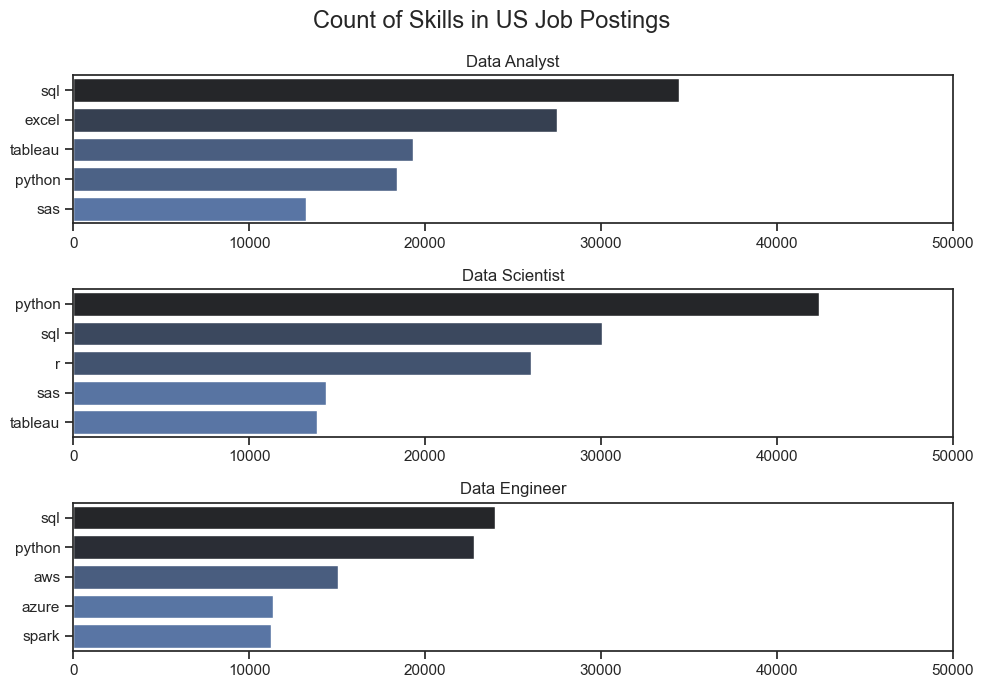

In [53]:
fig, ax = plt.subplots(3,1, figsize=(10,7))

sns.set_theme(style= 'ticks')

for i, title in enumerate(job_titles):
    df_plot= df_skill_count[df_skill_count['job_title_short']== title].head(5)
    sns.barplot(data= df_plot, x= 'skill_count', y= 'job_skills', hue= 'skill_count', palette='dark:b_r', ax= ax[i], legend=False)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,50000)
    ax[i].set_xlabel('')


fig.suptitle('Count of Skills in US Job Postings', fontsize= 17)
plt.tight_layout()

In [27]:
len(job_titles)

3

In [48]:
df_job_title_count = df_US.job_title_short.value_counts().reset_index(name= 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [50]:
df_skill_percent = pd.merge(df_skill_count, df_job_title_count, how= 'left', on= 'job_title_short')
df_skill_percent

,job_title_short,job_skills,skill_count,jobs_total
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
1865,Business Analyst,cordova,1,7382
1866,Data Analyst,chainer,1,67816
1867,Senior Data Engineer,powerbi,1,9289
1868,Data Scientist,symfony,1,58830


In [61]:
df_skill_percent['skill_percent'] = df_skill_percent['skill_count'] / df_skill_percent['jobs_total'] * 100
df_skill_percent

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Business Analyst,cordova,1,7382,0.013546
1866,Data Analyst,chainer,1,67816,0.001475
1867,Senior Data Engineer,powerbi,1,9289,0.010765
1868,Data Scientist,symfony,1,58830,0.001700


Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

IN `ax[i].text(perc+1, v+.09, f'{perc:.0f}%', va='center')` the x (of what percent) is the value `perc` or how far it's from zero on the x axis and the y (how many index down to plot it) is the `n` which is the number of the bar from up to down ,`'f{perc:.0f}'` string formating the f is as floating point more accurate to the numbers than using `int()`


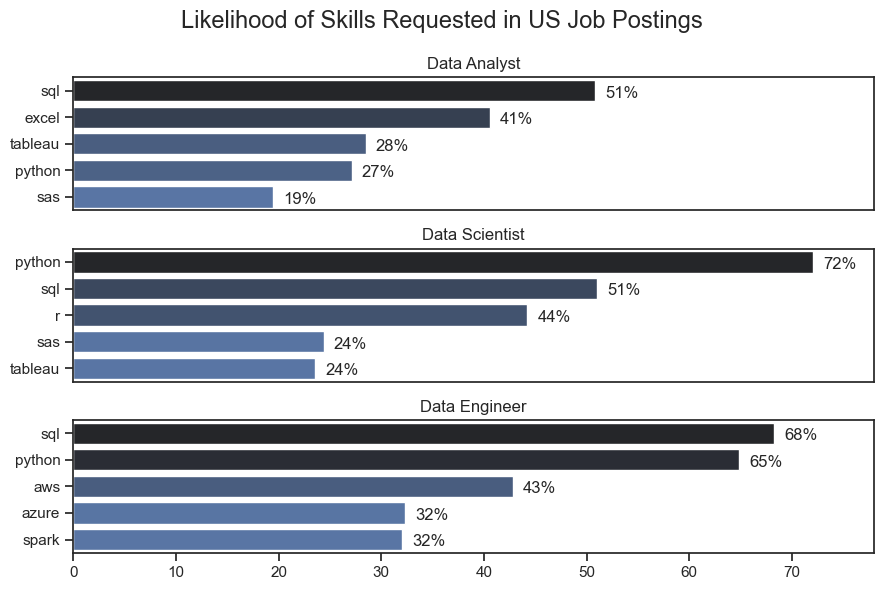

In [ ]:
fig, ax = plt.subplots(len(job_titles),1, figsize=(9,6))

sns.set_theme(style= 'ticks')

for i, title in enumerate(job_titles):
    df_plots= df_skill_percent[df_skill_percent['job_title_short']== title].head(5)
    sns.barplot(data= df_plots, x= 'skill_percent', y= 'job_skills', hue= 'skill_count', palette='dark:b_r', ax= ax[i], legend=False)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,78)
    ax[i].set_xlabel('')

    # remove the x-axis tick labels for better readability using empty list
    if i != len(job_titles)-1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, perc in enumerate(df_plots['skill_percent']):
        ax[i].text(perc+1, n+.09, f'{perc:.0f}%', va='center')
    # n is x (horizontal) distance from the y axis  # perc is the y (vertical) distance from the x axis 
    

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize= 17)
fig.tight_layout()